In [2]:
from wordcloud import WordCloud
from pymongo import MongoClient
import pandas as pd
import re

#Establish MongoDB connection
client = MongoClient()
db = client.redditdb

#Conversion of collection to dataframe for processing
col1 = db.redditdb
set1 = pd.DataFrame(list(col1.find()))

#Only text field required for parsing
x = set1['text']

#Remove and replace all non-letters with spaces
letters_only = re.sub("[^a-zA-Z]", " ", str(x))

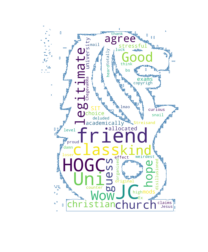

<Figure size 432x288 with 0 Axes>

In [4]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

#Get data directory
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#Read the mask image
sg_outline = np.array(Image.open(path.join(d, "merlion_outline.jpg")))

#Add list of words to be removed from the word cloud
stopwords = set(STOPWORDS)
stopwords.add("yes")
stopwords.add("one")
stopwords.add("dude")
stopwords.add("fucking")
stopwords.add("words")
stopwords.add("guy")
stopwords.add("looks")
stopwords.add("wa")
stopwords.add("many")
stopwords.add("te")
stopwords.add("yes")
stopwords.add("see")
stopwords.add("users")
stopwords.add("oh")
stopwords.add("edit")
stopwords.add("time")
stopwords.add("know")
stopwords.add("yesterday")
stopwords.add("thing")
stopwords.add("fuck")
stopwords.add("re")
stopwords.add("dear")
stopwords.add("post")
stopwords.add("cause")
stopwords.add("say")
stopwords.add("comment")
stopwords.add("OP")
stopwords.add("make")
stopwords.add("whole")
stopwords.add("former")
stopwords.add("member")
stopwords.add("screw")
stopwords.add("Repost")
stopwords.add("notice")
stopwords.add("going")
stopwords.add("piece")
stopwords.add("fo")
stopwords.add("upvoted")
stopwords.add("orignal")

wc = WordCloud(background_color="white", max_words=50, mask=sg_outline,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

#Generate word cloud
wc.generate(letters_only)

#Store to file
wc.to_file(path.join(d, "reddit_word_cloud.png"))

#Show the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [3]:
from datetime import datetime

newTime = []

#Convert date column to UTC+8 (Singapore Time)
for i in range(len(set1)):
    y = datetime.utcfromtimestamp(set1.time[i]).strftime('%Y-%m-%d %H:%M:%S')
    y1 = ((pd.to_datetime(y, errors='coerce')).tz_localize('UTC').tz_convert('Asia/Singapore')).strftime('%Y-%m-%d %H:%M:%S')
    newTime.append(y1)
    
df = pd.DataFrame(newTime, columns = ["time"])
set1["time"] = df

In [5]:
def get_hour(x):
    return x.strftime('%H')

days_arr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def get_day_of_week(x):
    return days_arr[x.weekday()]

In [6]:
hour = (pd.to_datetime(set1['time'])).apply(get_hour)

In [7]:
day_of_week = (pd.to_datetime(set1['time'])).apply(get_day_of_week)

In [8]:
#which HOUR the submission was CREATED
subHour = []

for i in range(len(set1)):
    subHour.append(hour[i])

In [9]:
#which DAY the submission was created
subDay = []

for i in range(len(set1)):
    subDay.append(day_of_week[i])

In [10]:
hour_and_day = pd.DataFrame(list(zip(subHour, subDay)), columns=['hour','day'])

In [11]:
finalDataSet = pd.concat([set1, hour_and_day], axis=1)

In [12]:
#Submissions that have more than or equals to 200 points
highScorers = finalDataSet[(finalDataSet.type == "submission") & (finalDataSet.score >= 200)] \
                .sort_values('score', ascending=False)

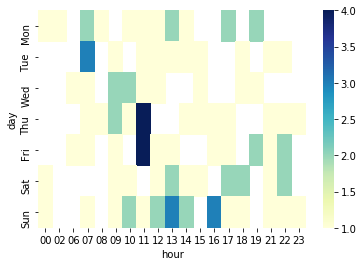

In [16]:
#Generating the heatmap of optimal submission time
#Transposed graph so it's easier to read day vs time

import seaborn as sns

df_heat = highScorers.groupby(["hour", "day"]).size().reset_index()
df_heat.columns = ["hour", "day", "size"]
df_heat2 = df_heat.pivot("hour", "day", "size")
rSgOptTime = sns.heatmap(df_heat2[days_arr].T , cmap="YlGnBu")

#Store to file
figure = rSgOptTime.get_figure()    
figure.savefig('reddit_singapore_optimal_submission_time.png', dpi=400)